In [1]:
from openqaoa.problems.maximumcut import MaximumCut
from openqaoa.backends import create_device
from qiskit import transpile
import networkx as nx
from openqaoa import QAOA  
from openqaoa.problems import MaximumCut
from openqaoa.utilities import ground_state_hamiltonian
import matplotlib.pyplot as plt
from openqaoa.utilities import plot_graph
from qiskit_aer.noise import (NoiseModel, depolarizing_error)


In [2]:
one_qubit_gates = ['h',
    'rx']
two_qubits_gates = ['cx']
#create depol. noise
def add_depolarizing_error(noise_model,prob1, prob2):
    noise_model = add_one_qubit_depolarizing_error(noise_model,prob1)
    noise_model = add_two_qubits_depolarizing_error(noise_model,prob2)
    return noise_model

#create 1 qubit depol. noise
def add_one_qubit_depolarizing_error(noise_model,prob):
    error = depolarizing_error(prob, 1)
    noise_model.add_all_qubit_quantum_error(error,one_qubit_gates)
    return noise_model

#create 2 qubits depol.noise
def add_two_qubits_depolarizing_error(noise_model,prob):
    error = depolarizing_error(prob, 2)
    noise_model.add_all_qubit_quantum_error(error, two_qubits_gates)
    return noise_model

noise_model = add_depolarizing_error(NoiseModel(),0.0001989 
                                               ,0.007905
                                              ) #ibm_quebec, 19/01/2024
noise_model

<NoiseModel on ['rx', 'h', 'cx']>

In [3]:

graph1 = nx.Graph()
graph1.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
graph1.add_edges_from([(0, 6), (0, 8), (1, 5), (2, 7), (2, 8), (3, 5), (3, 7), (4, 8), (6, 7), (7, 9), (8, 9)])

graph2 = nx.Graph()
graph2.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
graph2.add_edges_from([(0, 2), (0, 3), (0, 4), (0, 5), (0, 7), (0, 8), (1, 4), (1, 6), (1, 8), (1, 9), (2, 4), (2, 6), (3, 4), (3, 6), (3, 8), (3, 9), (4, 5), (4, 7), (4, 9), (5, 8), (6, 7), (7, 8), (7, 9), (8, 9)])

graph3 = nx.Graph()
graph3.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
graph3.add_edges_from([(0, 1), (0, 2), (0, 4), (0, 9), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 6), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (5, 9), (6, 8), (6, 9), (7, 8), (7, 9)])

graph4 = nx.Graph()
graph4.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
graph4.add_edges_from([(0, 3), (1, 3), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (3, 4), (3, 6), (3, 7), (4, 5), (4, 6), (4, 9), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9)])

graph5 = nx.Graph()
graph5.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
graph5.add_edges_from([(0, 5), (0, 7), (0, 8), (1, 2), (1, 3), (1, 4), (1, 6), (1, 9), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (3, 5), (3, 6), (3, 7), (3, 9), (4, 6), (4, 7), (4, 9), (5, 6), (6, 7), (6, 8), (7, 9)])

graph6 = nx.Graph()
graph6.add_nodes_from([1, 2, 3, 4, 5, 6])
graph6.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)])


mc1 = MaximumCut(graph1)
mc2 = MaximumCut(graph2)
mc3 = MaximumCut(graph3)
mc4 = MaximumCut(graph4)
mc5 = MaximumCut(graph5)
mc6 = MaximumCut(graph6)
mcs = [mc1, mc2, mc3, mc4, mc5,mc6]

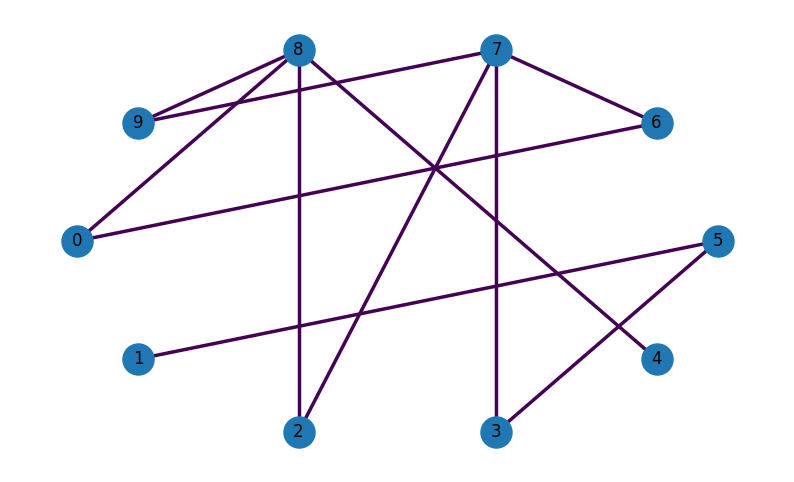

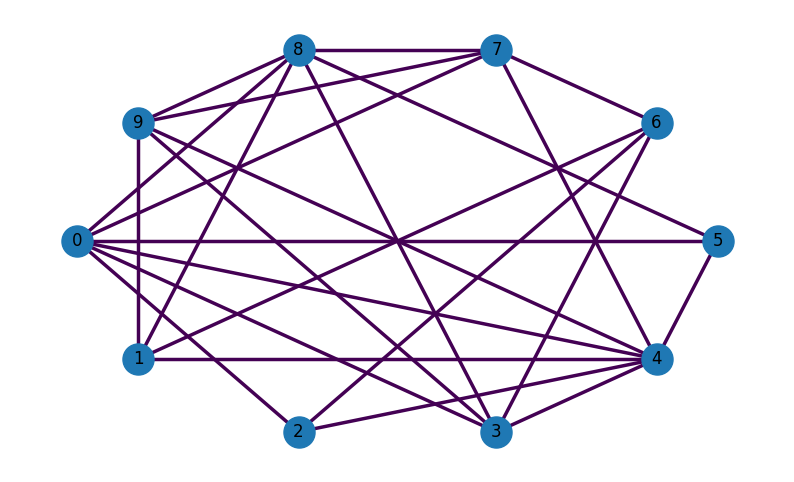

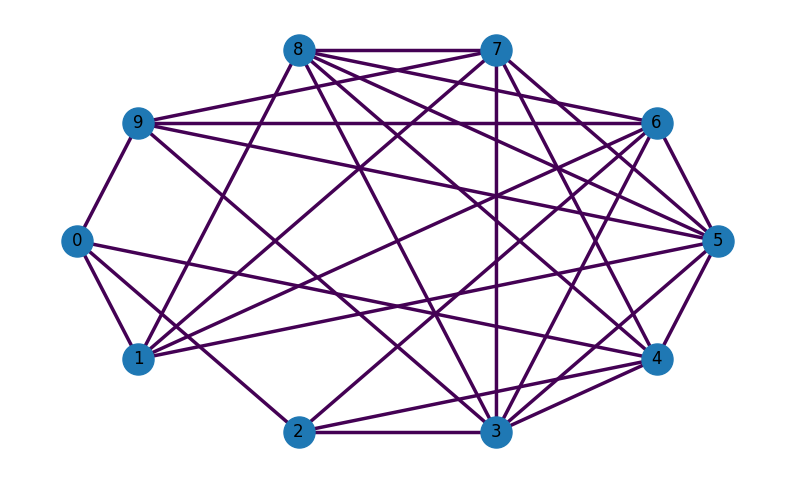

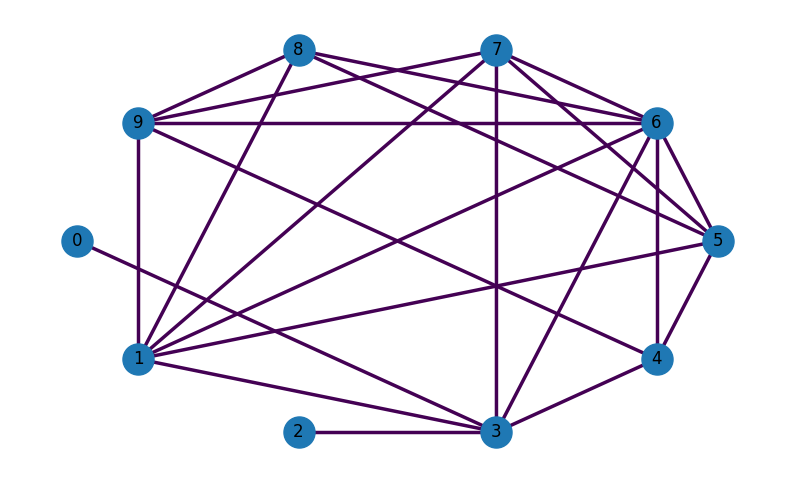

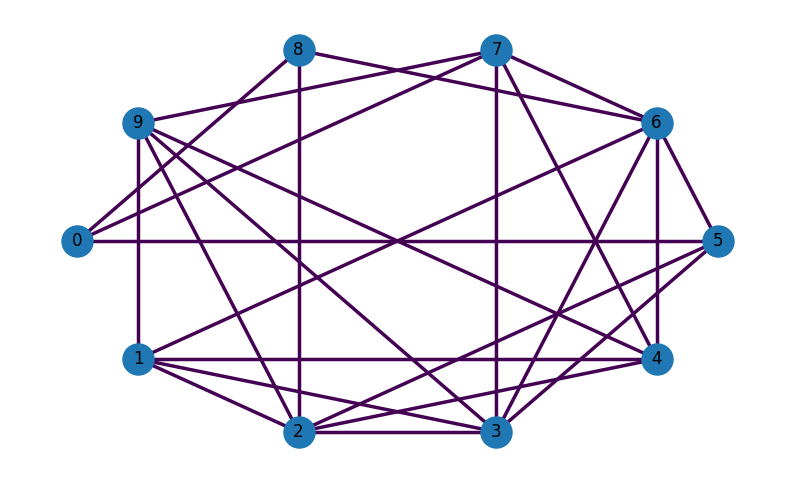

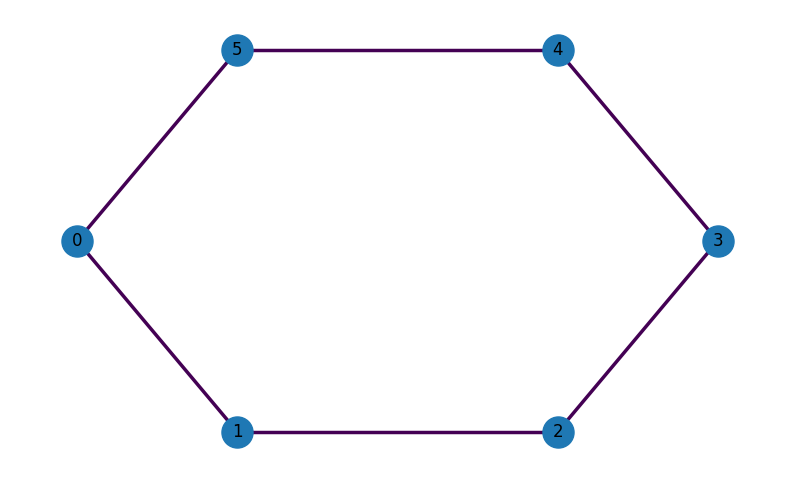

In [4]:
for mc in mcs:
    plot_graph(mc.G)

In [5]:
bruteforce_sols = []

for mc in mcs:
    maxcut_qubo = mc.qubo
    q = QAOA()
    q.compile(maxcut_qubo)
    q.solve_brute_force(verbose=True)

Ground State energy: -9.0, Solution: ['0000010110', '1000010110', '0000011110', '1111100001', '0111101001', '1111101001']
Ground State energy: -16.0, Solution: ['0111010100', '1000101011']
Ground State energy: -12.0, Solution: ['1001011100', '0110100011']
Ground State energy: -12.0, Solution: ['1110100110', '0001011001']
Ground State energy: -12.0, Solution: ['1011101000', '0100110110', '0101110110', '1010001001', '1011001001', '0100010111']
Ground State energy: -6.0, Solution: ['101010', '010101']


In [5]:
#q3.backend.parametric_circuit.draw()
#display(transpile(q2.backend.parametric_circuit,basis_gates=["h","rx","cx"]).draw())
#display(transpile(q3.backend.parametric_circuit,basis_gates=["h","rx","cx"]).draw())

params = 0-Richardson-fold_gates_at_random
states kept: 40
states kept: 40
states kept: 40
params = 1-Richardson-fold_gates_at_random
states kept: 40
states kept: 40
states kept: 40
params = 2-Richardson-fold_gates_at_random
states kept: 40
states kept: 40
states kept: 40
params = 3-Richardson-fold_gates_at_random
states kept: 40
states kept: 40
states kept: 40
params = 4-Richardson-fold_gates_at_random
states kept: 40
states kept: 40
states kept: 40
params = 5-Richardson-fold_gates_at_random


C:\Users\Adriano\AppData\Local\Temp\ipykernel_8140\1430143398.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7,7))


states kept: 2
states kept: 40
states kept: 40


' import json\n#factories = [ "Exp", "FakeNodes", "Linear", "Richardson"]\nfactories = ["AdaExp"]\nscales = ["fold_gates_at_random", "fold_gates_from_left", "fold_gates_from_right"]\n\nfor factory in factories:\n    for scaling in scales:\n        print("%s %s" % (factory, scaling))\n\n        cal_data = {\n            "factory": factory,\n            "scaling": scaling,\n            "seed": 1,\n            "scale_factor": [2,5,8]\n        }\n        json_object = json.dumps(cal_data, indent=4)\n \n        # Writing to sample.json\n        with open("caldata.json", "w") as outfile:\n            outfile.write(json_object)\n        q2 = QAOA()\n\n        qiskit_device = create_device(location=\'local\', name=\'qiskit.shot_simulator\')\n        q2.set_device(qiskit_device)\n        q2.set_circuit_properties(p=3,param_type=\'standard\', init_type=\'rand\', mixer_hamiltonian=\'x\')\n        q2.set_classical_optimizer(method=\'nelder-mead\', maxiter=150, tol=0.001,\n                         

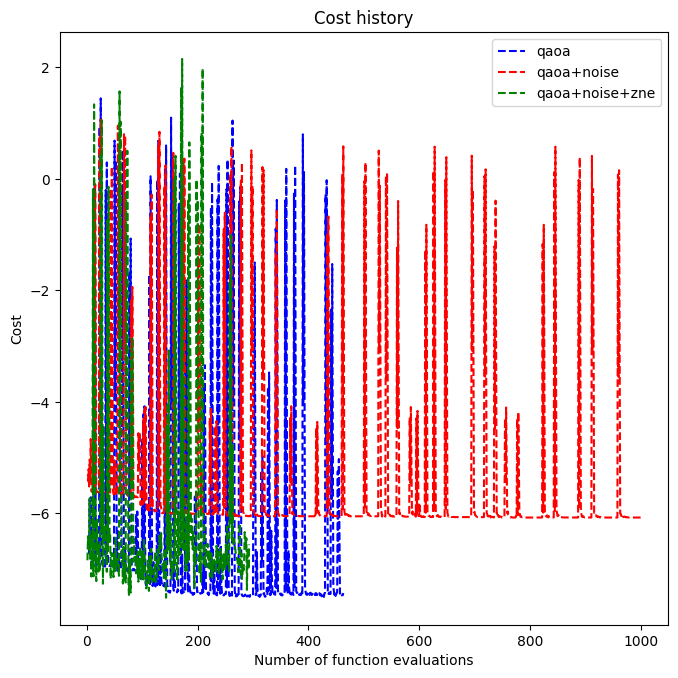

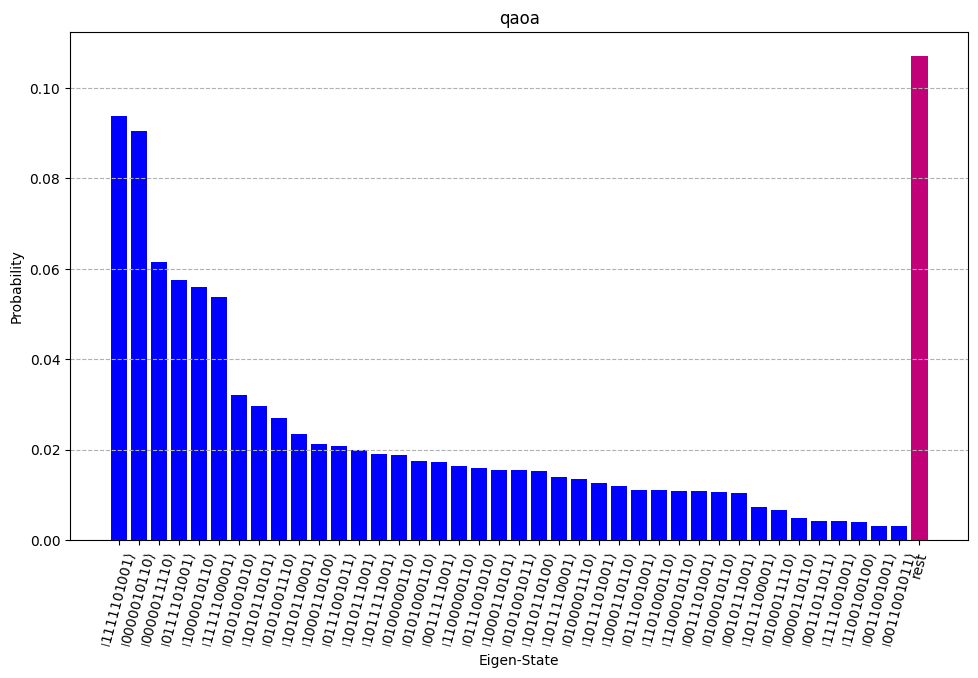

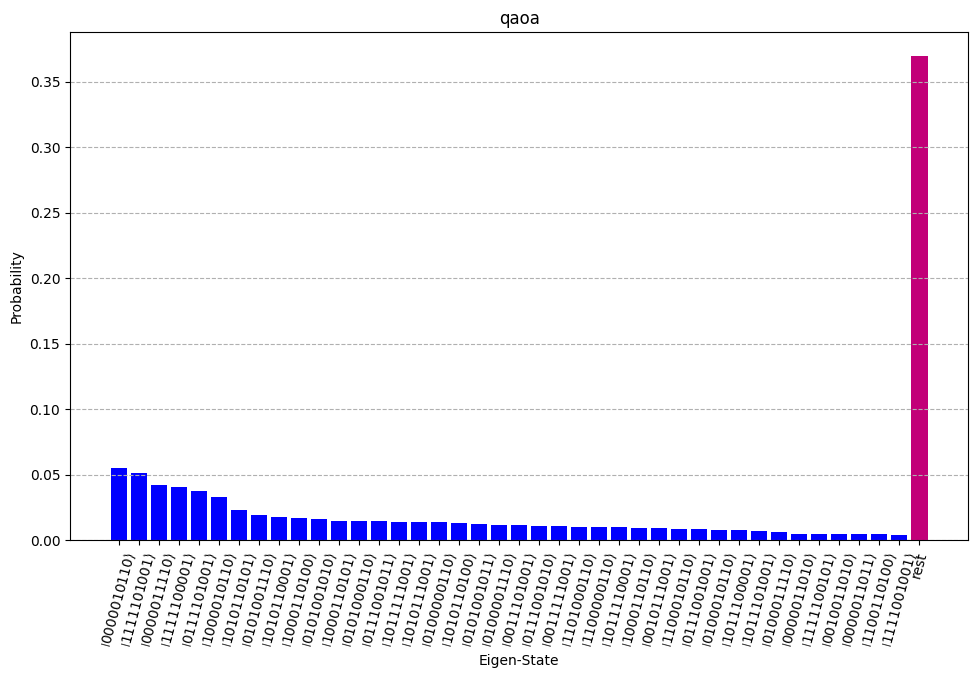

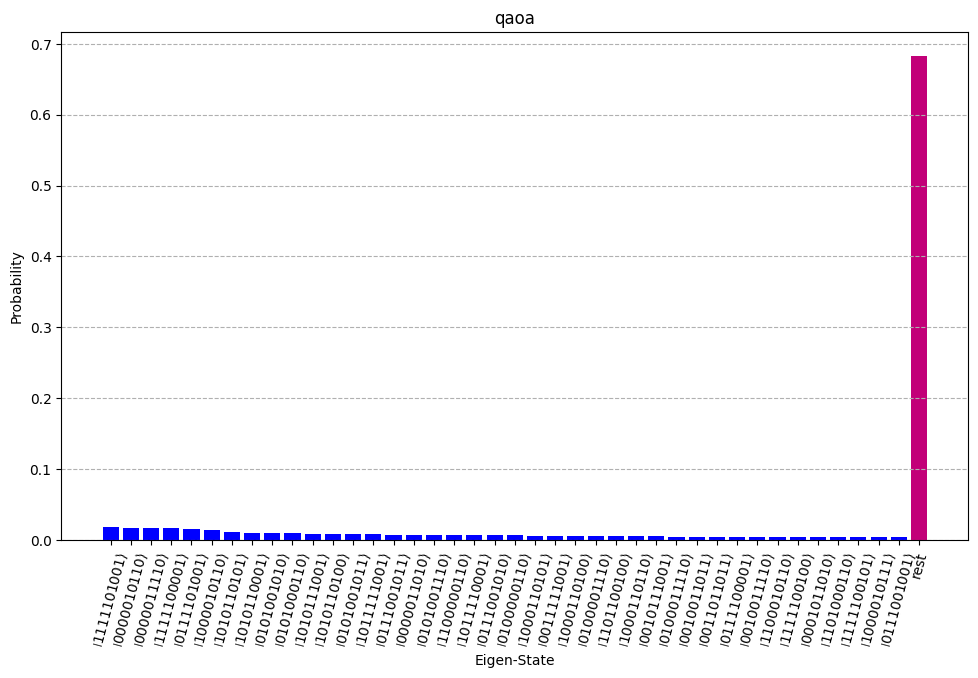

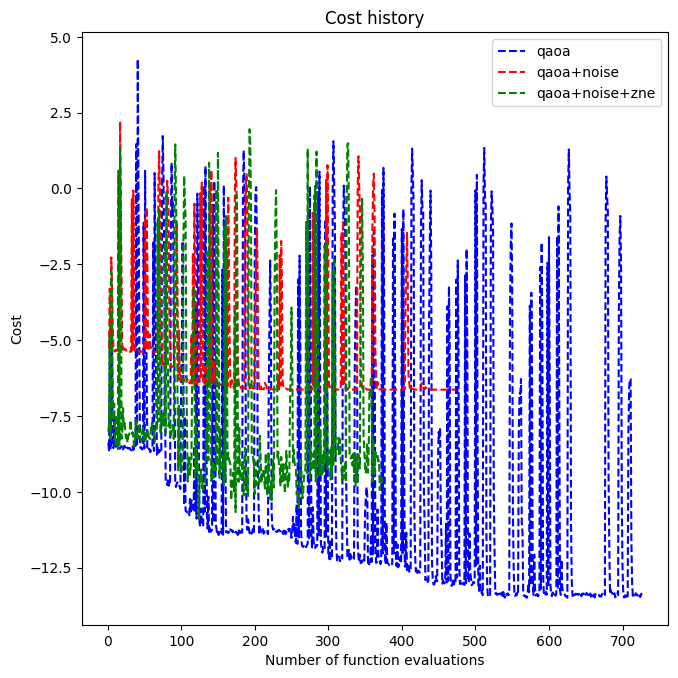

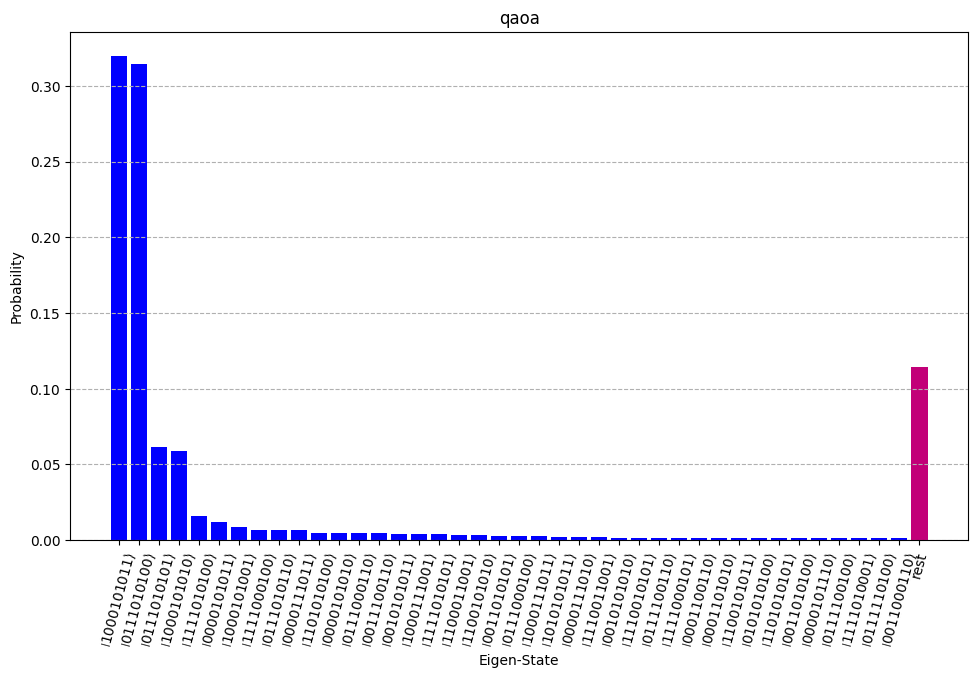

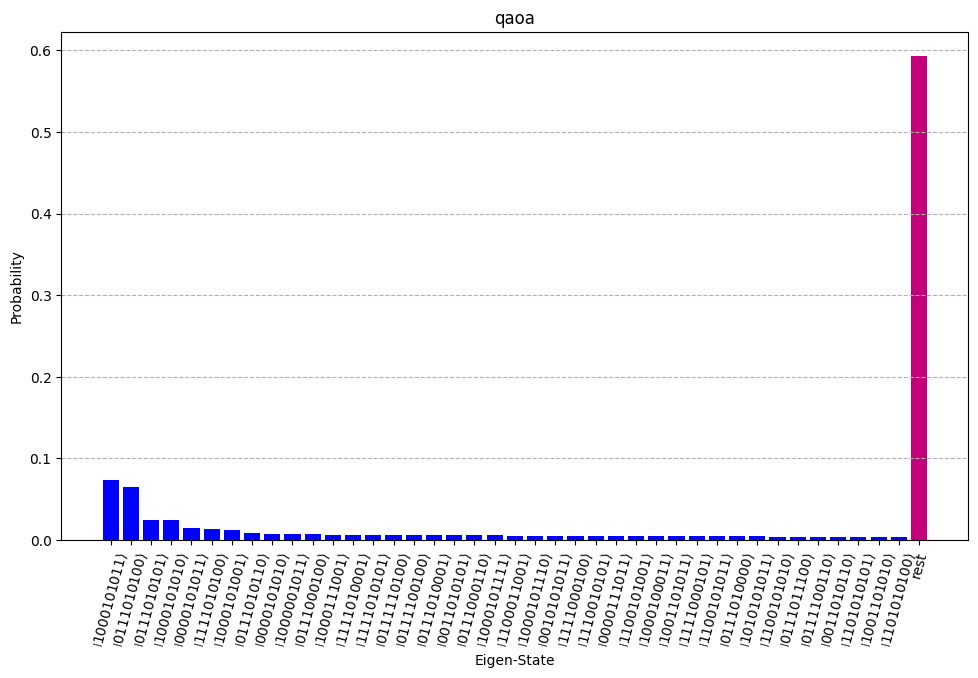

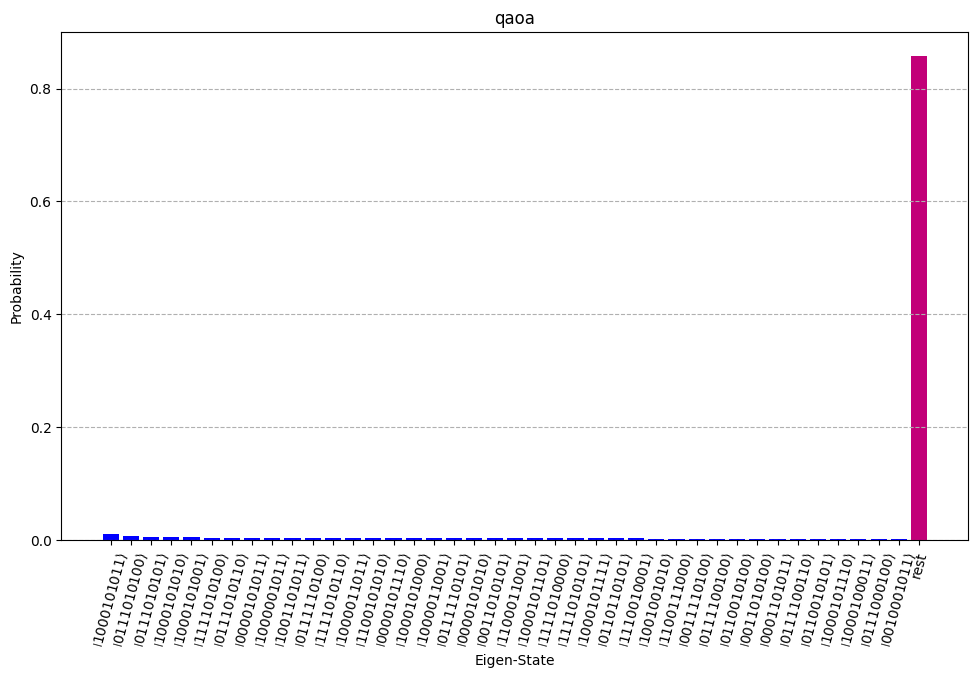

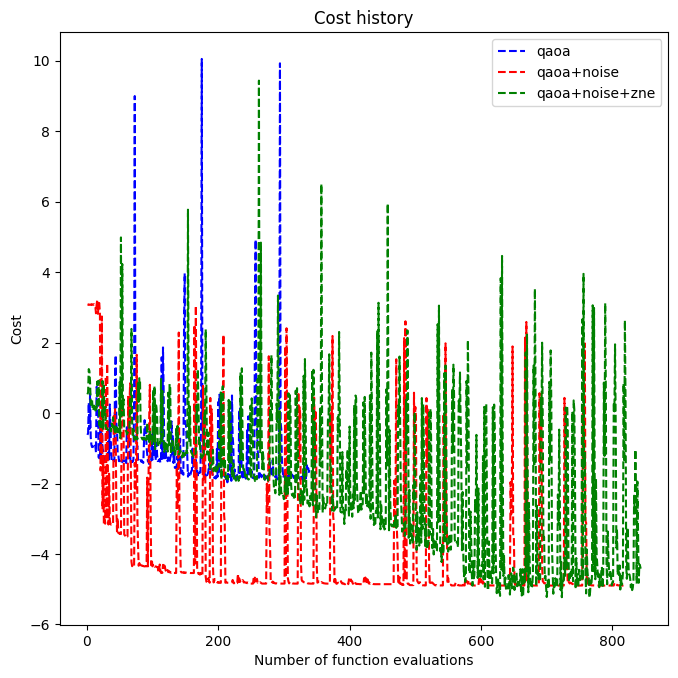

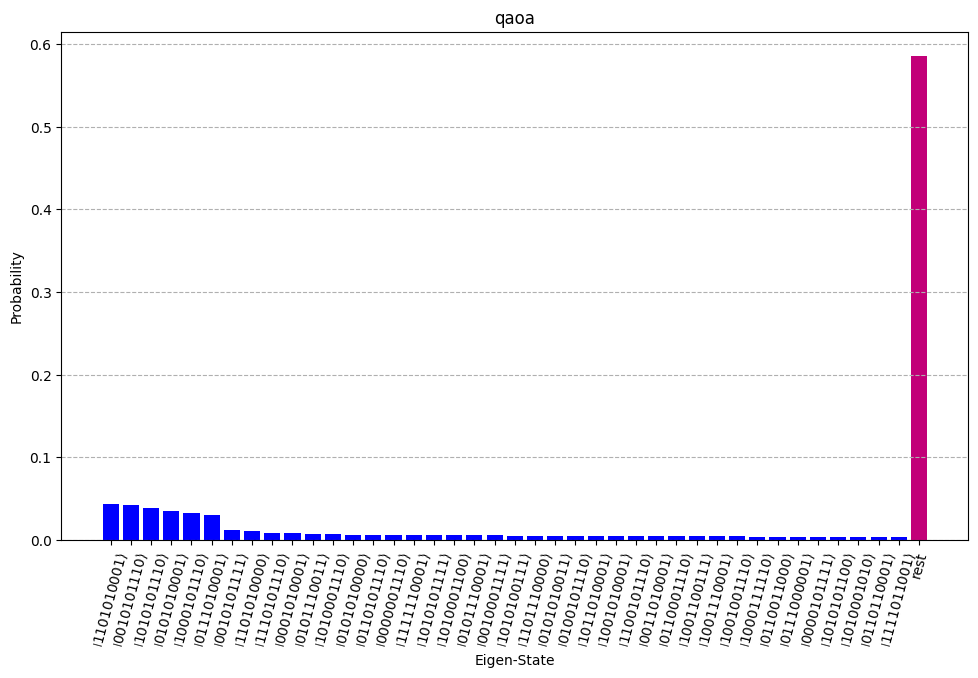

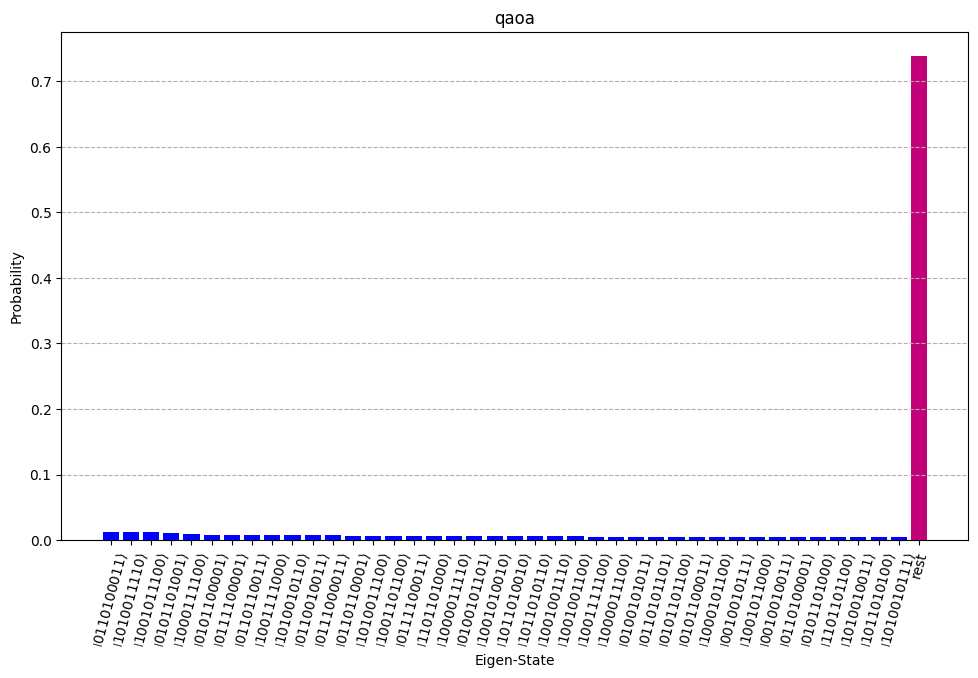

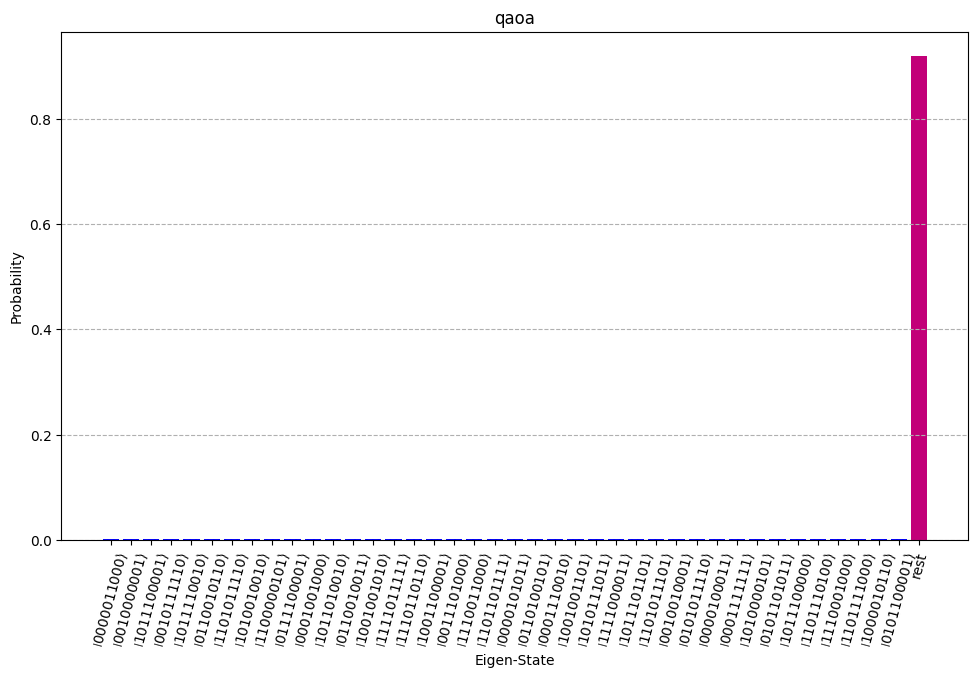

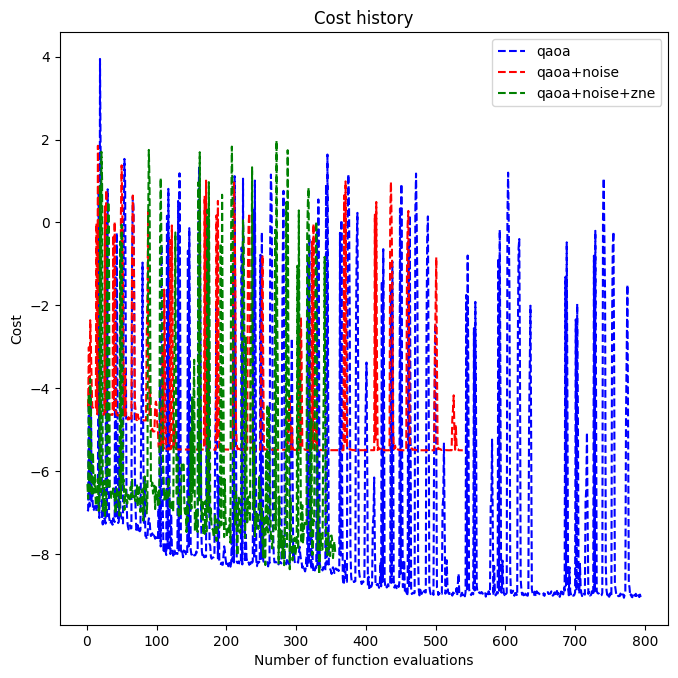

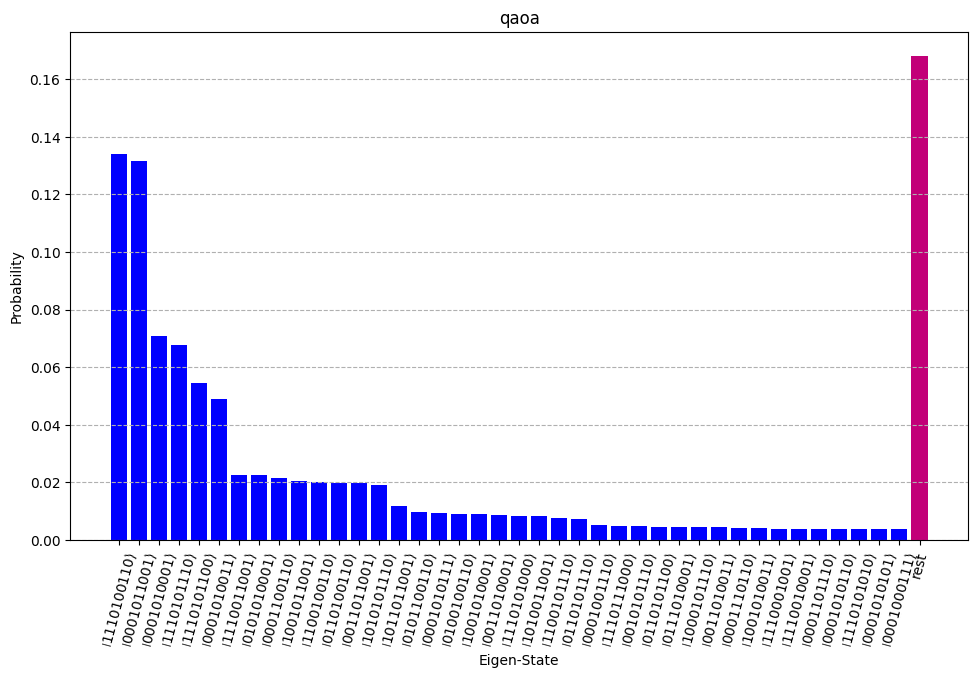

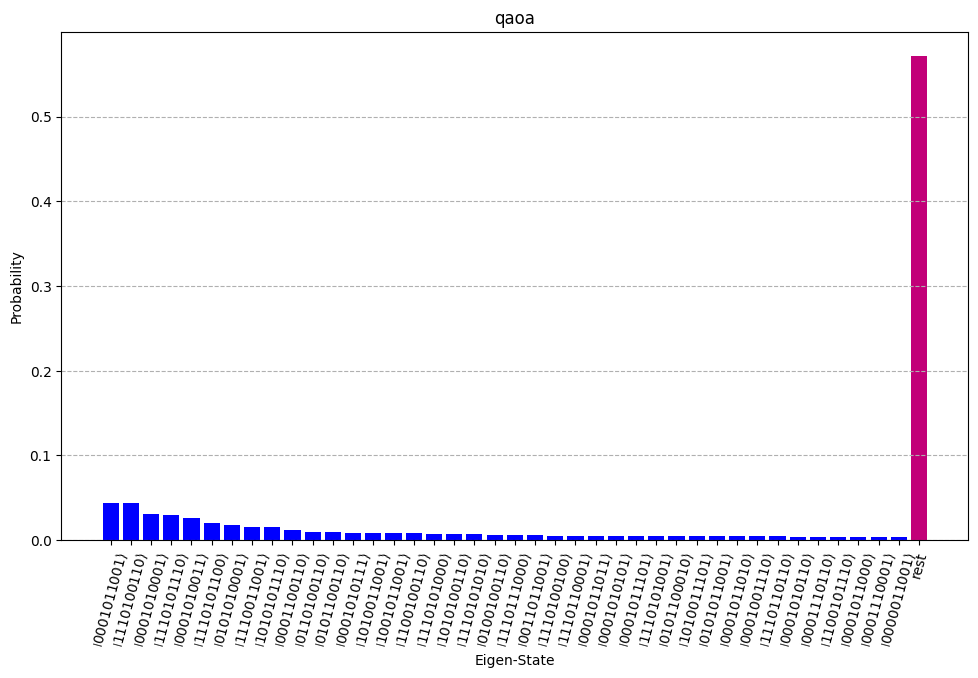

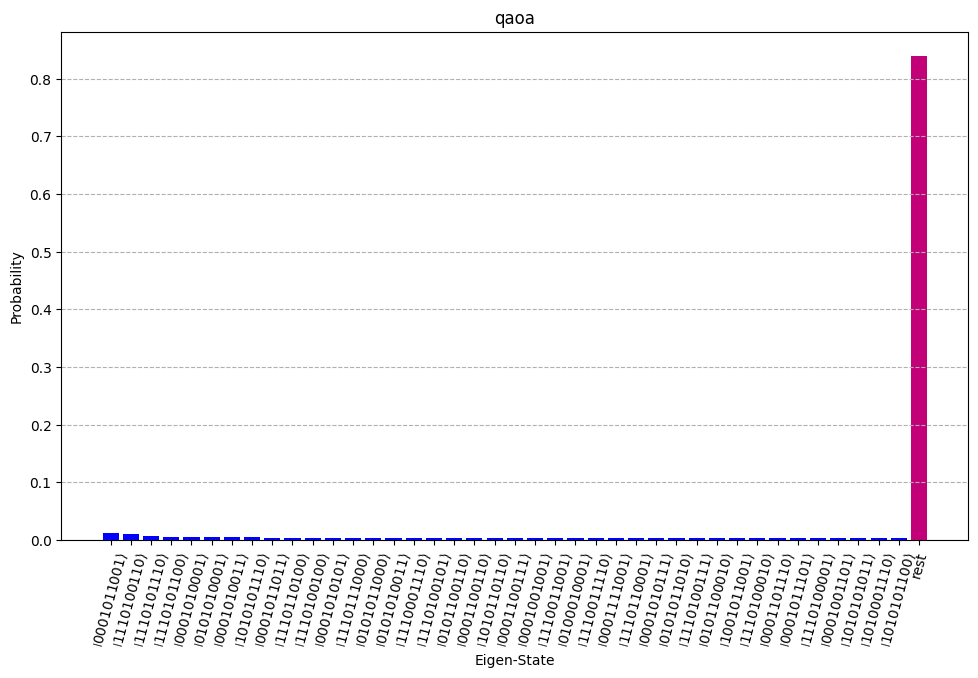

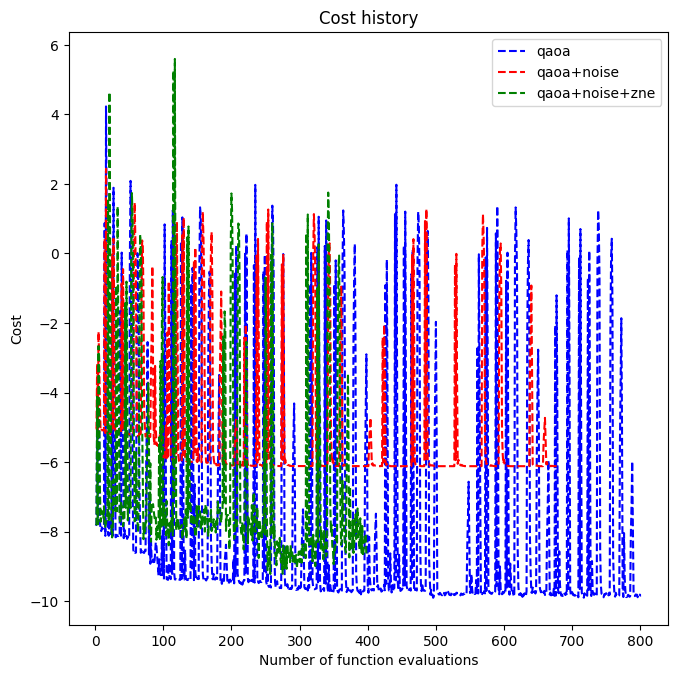

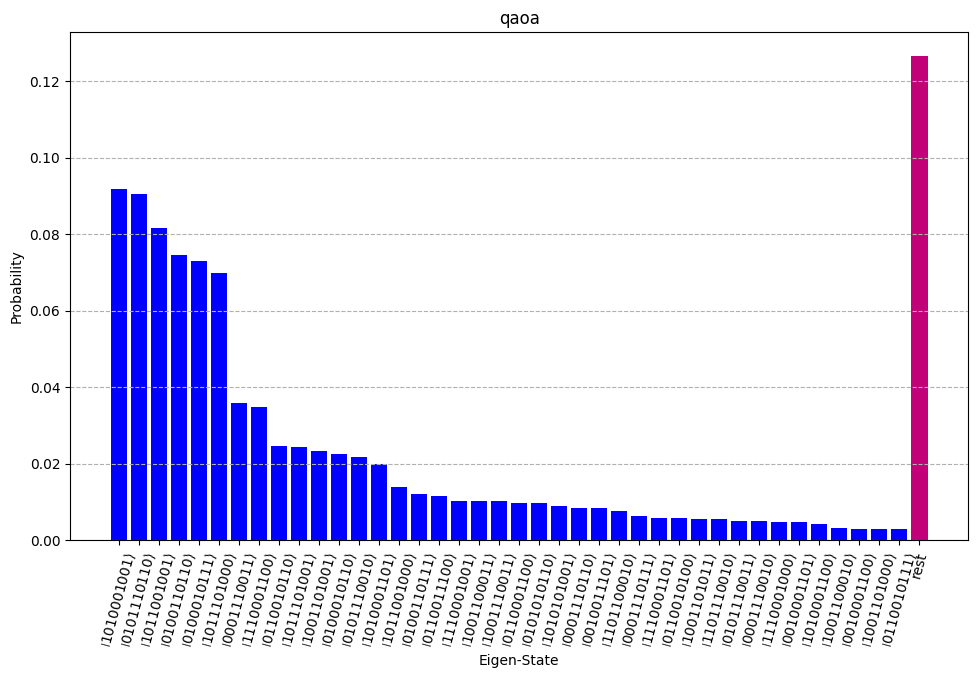

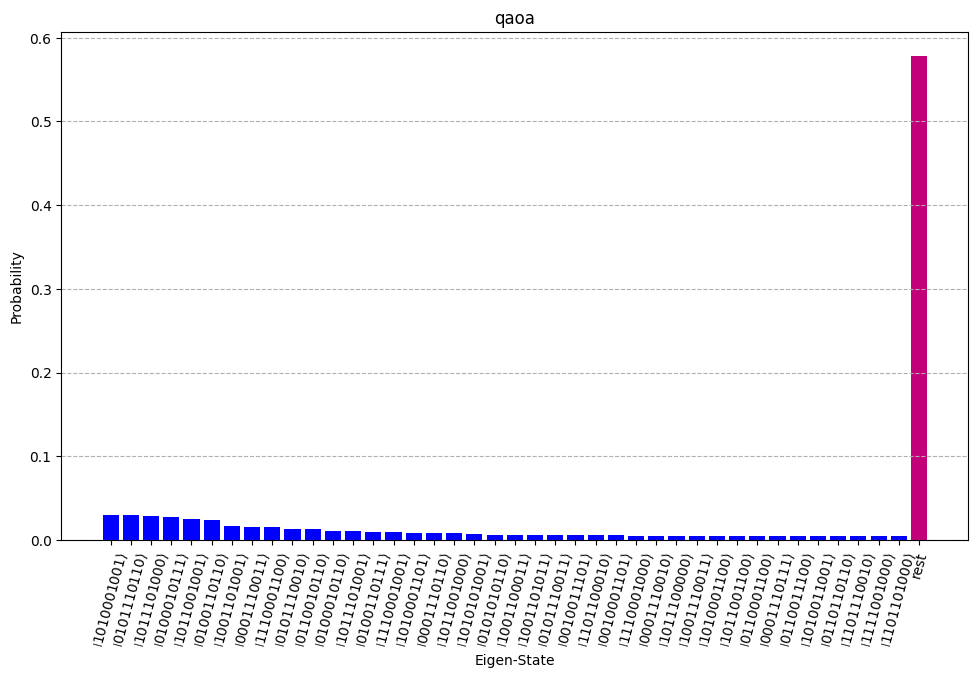

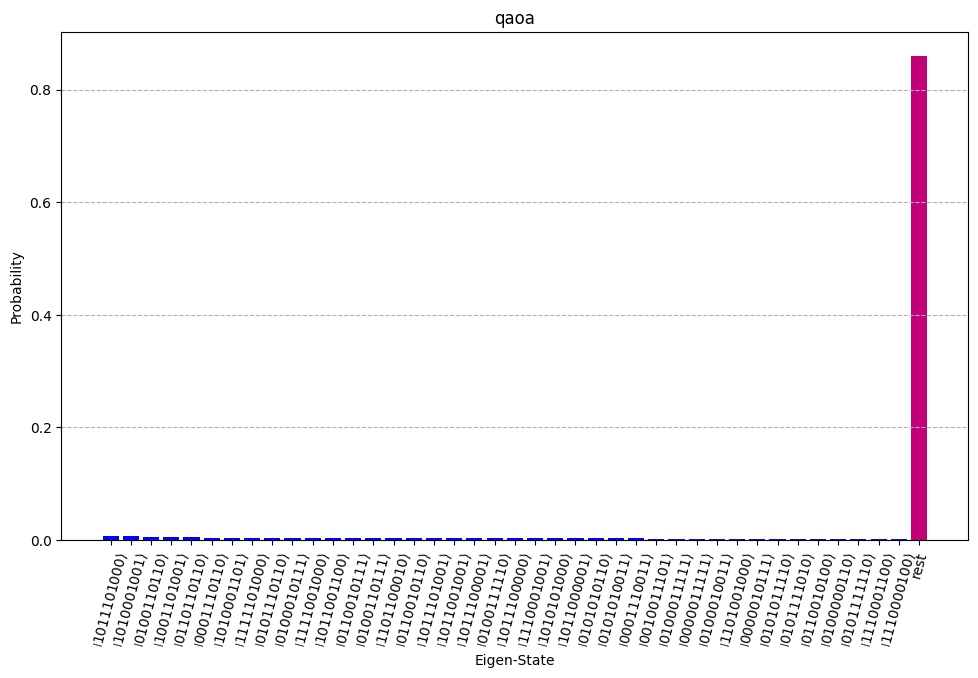

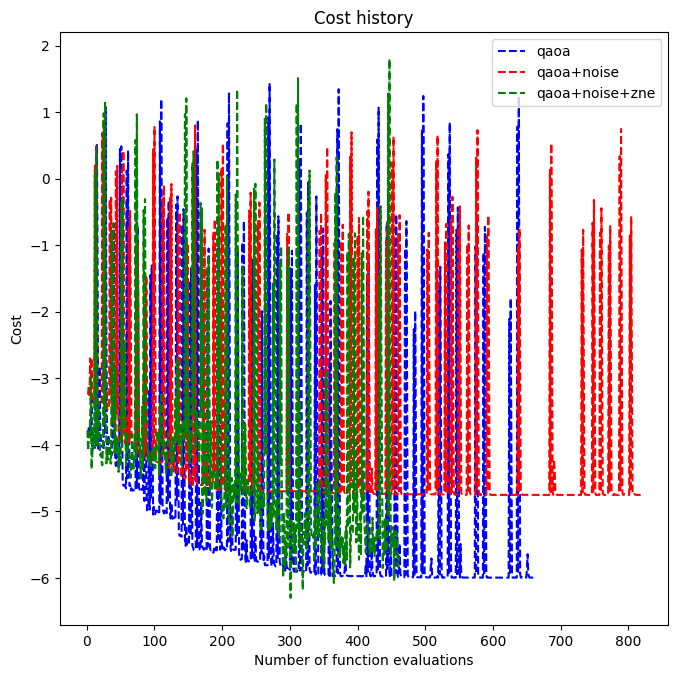

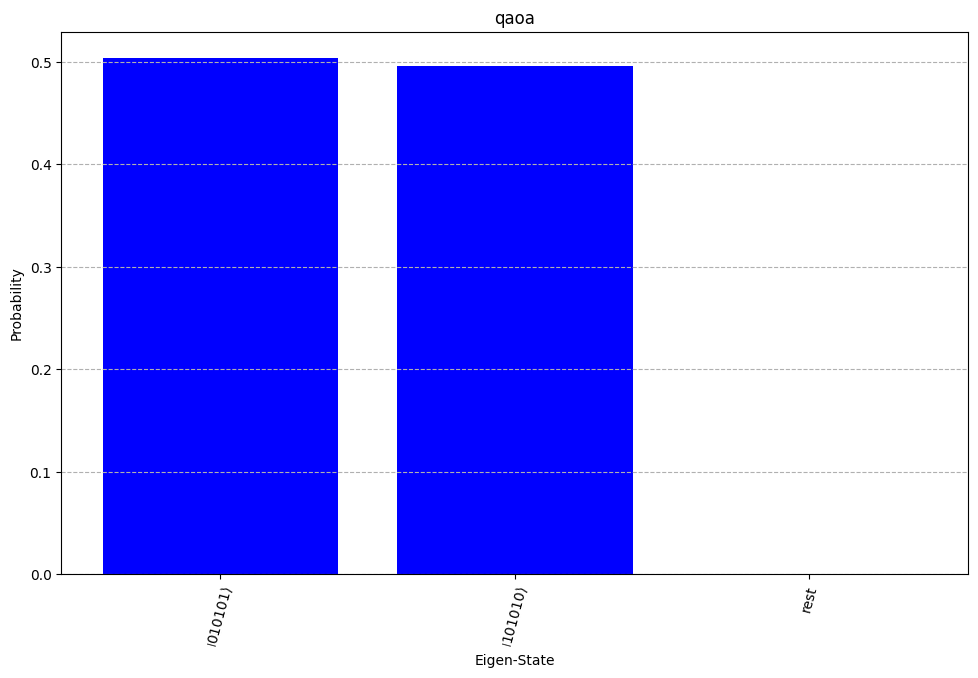

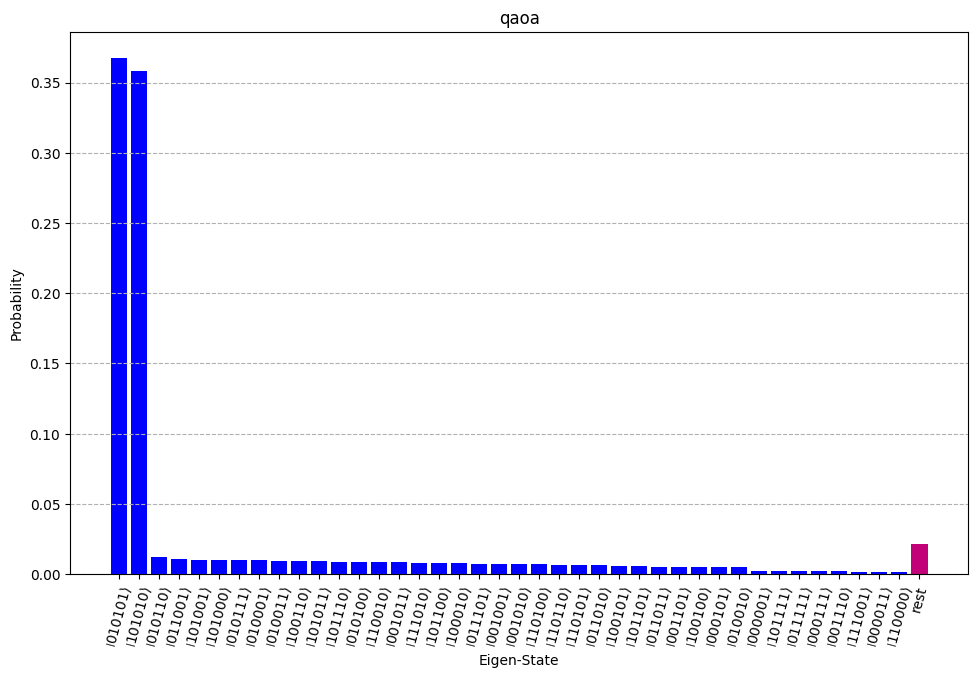

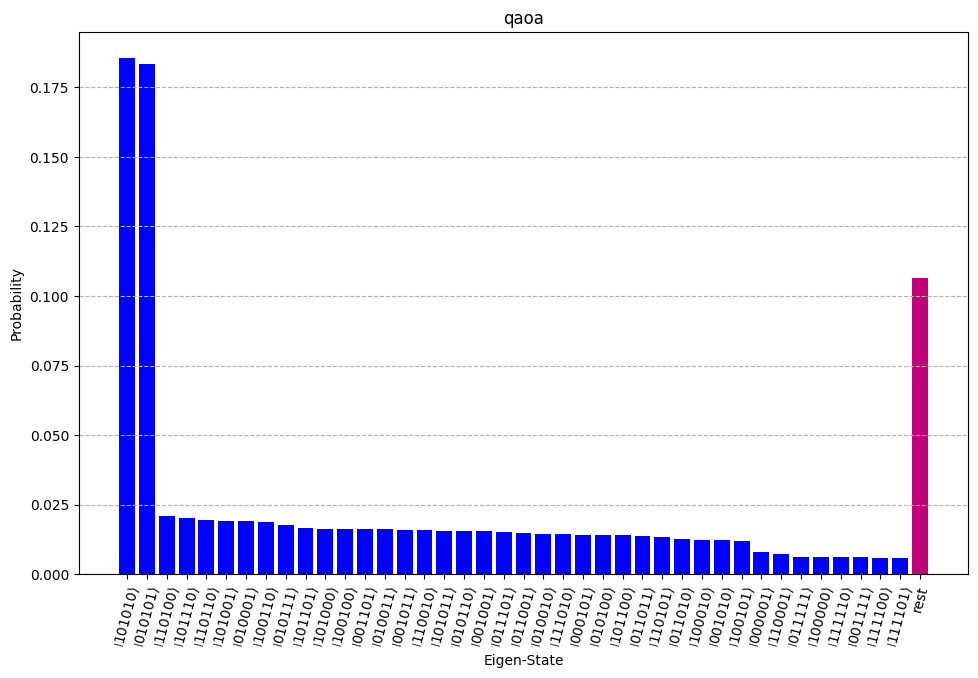

In [11]:
fact_objs=[]
ps = [4,4,4,4,4,4# 3, 4, 2, 3
     ]
param_types = ["standard", "standard", "standard", "standard", "standard","standard"]
init_types = ["ramp", "ramp", "rand", "ramp", "ramp","ramp"]
mixer_hams = ["x", "x", "x", "x", "x","x"]
optimizers = ["Powell", "Powell", "Powell", "Powell", "Powell","Powell"]

#mitiq params to explore
factories = [ #"AdaExp", "Exp", "FakeNodes", "Linear", "Poly", "PolyExp",
    "Richardson"
]
scales = ["fold_gates_at_random", #"fold_gates_from_left", 
          #"fold_gates_from_right"
         ]
scale_factor = [1,2,3]
seed = 1
order = len(scale_factor) - 1
steps = 10
itr = 0
for index, maxcut_prob in enumerate(mcs):
    maxcut_qubo = maxcut_prob.qubo
    maxcut_hamiltonian = maxcut_qubo.hamiltonian

    for factory in factories:
        for scale in scales:
            param_type = param_types[index]
            init_type = init_types[index]
            mixer_hamiltonian = mixer_hams[index]
            optimizer = optimizers[index]
            p = ps[index]
            print("params = %s-%s-%s" % (str(index), str(factory), str(scale)))
            itr = itr +1
            if itr ==1000000:
                print('continue')
                continue
            q1 = QAOA()
            qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
            q1.set_device(qiskit_device)
            q1.set_circuit_properties(p=p, param_type=param_type, init_type=init_type, mixer_hamiltonian=mixer_hamiltonian)
            q1.set_backend_properties(n_shots=10000)
            q1.set_classical_optimizer(method=optimizer, maxiter=200, tol=0.001,maxfev=1000,
            optimization_progress=True, cost_progress=True, parameter_log=True)
            q1.compile(maxcut_qubo)
            q1.optimize()
            #correct_solution1 = ground_state_hamiltonian(q1.cost_hamil)
            #print(correct_solution1)
            opt_results1 = q1.result
            q2 = QAOA()
            qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
            q2.set_device(qiskit_device)
            q2.set_circuit_properties(p=p, param_type=param_type, init_type=init_type, mixer_hamiltonian=mixer_hamiltonian)
            q2.set_classical_optimizer(method=optimizer, maxiter=200, tol=0.001,maxfev=1000,
                                    optimization_progress=True, cost_progress=True, parameter_log=True)
            q2.set_backend_properties(n_shots=5000, seed_simulator=1,
                                    noise_model=noise_model)
            q2.compile(maxcut_qubo)
            q2.backend.parametric_circuit = transpile(q2.backend.parametric_circuit,basis_gates=["h","rx","cx"])
            q2.optimize()
            #correct_solution2 = ground_state_hamiltonian(q2.cost_hamil)
            opt_results2 = q2.result
            #print(correct_solution2)
            qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
            q3 = QAOA()
            q3.set_device(qiskit_device)
            q3.set_circuit_properties(p=p, param_type=param_type, init_type=init_type, mixer_hamiltonian=mixer_hamiltonian)
            q3.set_classical_optimizer(method=optimizer, maxiter=200, tol=0.001,maxfev=1000,
                                    optimization_progress=True, cost_progress=True, parameter_log=True)
            q3.set_backend_properties(n_shots=5000, seed_simulator=1 ,noise_model=noise_model)
            q3.set_error_mitigation_properties(error_mitigation_technique='mitiq_zne',factory = factory, scaling = scale, scale_factors = scale_factor, order = order, steps = steps)
            q3.compile(maxcut_qubo)
            q3.backend.parametric_circuit = transpile(q3.backend.parametric_circuit,basis_gates=["h","rx","cx"])
            q3.optimize()
            #fact_objs.append(q3.backend.result_factory_objs)
            #correct_solution3 = ground_state_hamiltonian(q3.cost_hamil)
            #print(correct_solution3)
            opt_results3 = q3.result

            #plot_cost(opt_results2,)

            fig, ax = plt.subplots(figsize=(7,7))
            opt_results1.plot_cost(figsize=(7,7),color='blue',label='qaoa',ax=ax)
            opt_results2.plot_cost(figsize=(7,7),color='red',label='qaoa+noise',ax=ax)
            opt_results3.plot_cost(figsize=(7,7),color='green',label='qaoa+noise+zne',ax=ax) 
            """  plt.savefig("../../results/Marco_Results/MaxCut/no_noise/inst_%d/%s-%s-%s-%s-%s-1.png" % (index, str(p), str(param_type), str(init_type), str(mixer_hamiltonian), str(optimizer))) """
            #fig2, ax2 = plt.subplots(figsize=(7,4))
            """ opt_results2.plot_cost(figsize=(7,4),color='red',label='qaoa+noise',ax=ax2)
            opt_results3.plot_cost(figsize=(7,4),color='green',label='qaoa+noise+zne',ax=ax2) """
            fig.tight_layout(pad=1.5, h_pad=2)
            plt.savefig("./inst_%d/%s-%s-cost.png" % (index, str(factory), str(scale)))

            fig, ax = plt.subplots(figsize=(10,7))
            opt_results1.plot_probabilities(figsize=(10,7),color='blue',label='qaoa',ax=ax)
            fig.tight_layout(pad=1.5, h_pad=2)
            plt.savefig("./inst_%d/%s-%s-histogram_noiseless.png" % (index, str(factory), str(scale)))

            fig, ax = plt.subplots(figsize=(10,7))
            opt_results2.plot_probabilities(figsize=(10,7),color='blue',label='qaoa',ax=ax)
            fig.tight_layout(pad=1.5, h_pad=2)
            plt.savefig("./inst_%d/%s-%s-histogram_noisy.png" % (index, str(factory), str(scale)))

            fig, ax = plt.subplots(figsize=(10,7))
            opt_results3.plot_probabilities(figsize=(10,7),color='blue',label='qaoa',ax=ax)
            fig.tight_layout(pad=1.5, h_pad=2)
            plt.savefig("./inst_%d/%s-%s-histogram_zne.png" % (index, str(factory), str(scale)))
""" import json
#factories = [ "Exp", "FakeNodes", "Linear", "Richardson"]
factories = ["AdaExp"]
scales = ["fold_gates_at_random", "fold_gates_from_left", "fold_gates_from_right"]

for factory in factories:
    for scaling in scales:
        print("%s %s" % (factory, scaling))

        cal_data = {
            "factory": factory,
            "scaling": scaling,
            "seed": 1,
            "scale_factor": [2,5,8]
        }
        json_object = json.dumps(cal_data, indent=4)
 
        # Writing to sample.json
        with open("caldata.json", "w") as outfile:
            outfile.write(json_object)
        q2 = QAOA()

        qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
        q2.set_device(qiskit_device)
        q2.set_circuit_properties(p=3,param_type='standard', init_type='rand', mixer_hamiltonian='x')
        q2.set_classical_optimizer(method='nelder-mead', maxiter=150, tol=0.001,
                                optimization_progress=True, cost_progress=True, parameter_log=True)
        q2.set_backend_properties(n_shots=5000, seed_simulator=1,
                                noise_model=noise_model)
        q2.set_error_mitigation_properties(error_mitigation_technique='mitiq_zne',n_batches=64,calibration_data_location="caldata.json")
        q2.compile(maxcut_qubo)
        q2.optimize()
        correct_solution3 = ground_state_hamiltonian(q2.cost_hamil)
        print(correct_solution3)
        opt_results2 = q2.result

        #plot_cost(opt_results2,)

        fig, ax = plt.subplots(figsize=(7,4))
        opt_results2.plot_cost(figsize=(7,4),color='red',label='qaoa+noise+zne',ax=ax)
        plt.savefig("%s-%s.png" % (str(factory), str(scaling)))
"""        

Problem 0 (1/6):
* brute force ['0000010110', '1000010110', '0000011110', '1111100001', '0111101001', '1111101001']
* qaoa - noiseless
    * 1111101001 9.2% aprox. prob of measure
    * 0000010110 8.7% aprox. prob of measure
    * 0000011110 6% aprox. prob of measure
    * 1111100001 5.9% aprox. prob of measure
    * 0111101001 aprox 5.7% prob of measure
    * 1000010110 aprox 6.1% prob of measure
    * aprox 41.6% prob of optimal value measured
Problem 1 (2/6):
* brute force ['101010', '010101']
* qaoa - noiseless
    * 010101 51% aprox. prob of measure
    * 101010 49% aprox. prob of measure
    * aprox 100% prob of optimal value measured
* qaoa -noisy
    * 010101 32% aprox prob of measure
    * 101010 31% aprox prob of measure
    * 63% aprox prob of optimal value measured
* qaoa - zne
    * 010101 17.7% aprox prob of measure
    * 101010 20% aprox prob of measure
    * 37% aprov prob of optimal value measured

## Discussion

A great difference in the zne mitigation is seen when comparing problems 1 to 5(dificult instances) against problem 6 (a simpler one). While problems 1 to 5 gets just full noisy results (even worse results than just a joisy circuit), problem 6 achieves lowest cost optimization when having zne. Anyways, the prob of optimal value is still lower than the noisy results, so a better ZNE configuration should be try.

These works as evidence to the correct integration of ZNE into OpenQAOA.